# Cipher Type Prediction

In [4]:
import pandas as pd
df = pd.read_csv("cipher_dataset.csv")
print(df.head())


                                          Ciphertext        Algorithm
0  15-5321-32-1544-43.25.15-5325.15.23.6114-45.34...           POLLUX
1  QYQSHKWGGUADOEGXSAFPVGAFWTDSKIQRADWBVNERQIGXV ...  PROGRESSIVE_KEY
2   45-44-21-4154615354.14.23.2522-4255-1261-1241...           POLLUX
3  REGRDRTMNELSILJS VLDHQQ UIVRDMD OXWTCNCFSFPGI ...  PROGRESSIVE_KEY
4   14-52-42223325-23.4144-52.52.25-2314-22.61551...           POLLUX


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
X = vectorizer.fit_transform(df["Ciphertext"])
y = df["Algorithm"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Classification Report:
                 precision    recall  f1-score   support

         POLLUX       1.00      1.00      1.00        24
PROGRESSIVE_KEY       1.00      1.00      1.00        16

       accuracy                           1.00        40
      macro avg       1.00      1.00      1.00        40
   weighted avg       1.00      1.00      1.00        40

Model Accuracy: 100.00%


In [10]:
import pickle

# Save the trained model
with open("trained_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open("vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [11]:
from ipywidgets import Textarea, Button, Output, VBox, Label
from IPython.display import display
import pickle

with open("trained_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)
with open("vectorizer.pkl", "rb") as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

def predict_cipher(ciphertext):
    vectorized_input = vectorizer.transform([ciphertext])
    prediction = model.predict(vectorized_input)[0]
    return prediction

input_label = Label("Enter Ciphertext:")
input_field = Textarea(placeholder="Enter the ciphertext here...", layout={'width': '500px', 'height': '100px'})
predict_button = Button(description="Predict Cipher Type", button_style='info')
output = Output()

def on_predict_clicked(b):
    with output:
        output.clear_output()
        ciphertext = input_field.value.strip()
        if not ciphertext:
            print("Error: Please provide a ciphertext.")
        else:
            try:
                cipher_type = predict_cipher(ciphertext)
                print(f"Predicted Cipher Type: {cipher_type}")
            except Exception as e:
                print(f"Error: {str(e)}")

predict_button.on_click(on_predict_clicked)

# Display the GUI
layout = VBox([input_label, input_field, predict_button, output])
display(layout)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pickle

# Load the dataset
data = pd.read_csv('cipher_dataset.csv')

X = data['Ciphertext'].values
y = data['Algorithm'].values

le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


with open('nn_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


print("Classification Report:\n", classification_report(y_test, y_pred))



Epoch 1/5


C:\Users\ratho\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6290 - loss: 0.6894
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9819 - loss: 0.6585 
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.6104 
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.5404 
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.4535 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [14]:
from ipywidgets import Textarea, Button, Output, VBox, Label
from IPython.display import display
import pickle
import numpy as np

with open("nn_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

with open("vectorizer.pkl", "rb") as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

def predict_cipher(ciphertext):

    vectorized_input = vectorizer.transform([ciphertext]).toarray()
 
    prediction = model.predict(vectorized_input)
    prediction = (prediction > 0.5) 
    if prediction == 0:
        return "POLLUX"
    else:
        return "PROGRESSIVE_KEY"

input_label = Label("Enter Ciphertext:")
input_field = Textarea(placeholder="Enter the ciphertext here...", layout={'width': '500px', 'height': '100px'})
predict_button = Button(description="Predict Cipher Type", button_style='info')
output = Output()

def on_predict_clicked(b):
    with output:
        output.clear_output()
        ciphertext = input_field.value.strip()
        if not ciphertext:
            print("Error: Please provide a ciphertext.")
        else:
            try:
                cipher_type = predict_cipher(ciphertext)
                print(f"Predicted Cipher Type: {cipher_type}")
            except Exception as e:
                print(f"Error: {str(e)}")

predict_button.on_click(on_predict_clicked)

# Display the GUI
layout = VBox([input_label, input_field, predict_button, output])
display(layout)


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

df = pd.read_csv("cipher_dataset.csv")
label_encoder = LabelEncoder()
df['Algorithm'] = label_encoder.fit_transform(df['Algorithm'])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Ciphertext'])
sequences = tokenizer.texts_to_sequences(df['Ciphertext'])
max_length = max([len(sequence) for sequence in sequences])
X = pad_sequences(sequences, maxlen=max_length)

y = df['Algorithm'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

model.save('lstm_model.h5')

with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Model Accuracy: {accuracy[1]:.4f}")


Epoch 1/5


C:\Users\ratho\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.5844 - loss: 0.6899 - val_accuracy: 1.0000 - val_loss: 0.6590
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.6320 - val_accuracy: 1.0000 - val_loss: 0.5190
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9969 - loss: 0.4382 - val_accuracy: 1.0000 - val_loss: 0.3479
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9590 - loss: 0.2741 - val_accuracy: 1.0000 - val_loss: 0.2271
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.1625 - val_accuracy: 1.0000 - val_loss: 0.1077


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.1090 
LSTM Model Accuracy: 1.0000


In [28]:
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from ipywidgets import Textarea, Button, Output, VBox, Label
from IPython.display import display

model = load_model('lstm_model.h5')

with open('tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

def predict_cipher(ciphertext):
    try:
        sequence = tokenizer.texts_to_sequences([ciphertext])
        padded_sequence = pad_sequences(sequence, maxlen=50) 
        prediction = model.predict(padded_sequence, verbose=0)[0]  
        return 'POLLUX' if prediction < 0.5 else 'PROGRESSIVE_KEY'
    except Exception as e:
        return f"Error during prediction: {e}"


input_label = Label("Enter Ciphertext:")
input_field = Textarea(
    placeholder="Enter the ciphertext here...",
    layout={'width': '500px', 'height': '100px'}
)
predict_button = Button(description="Predict Cipher Type", button_style='info')
output = Output()

def on_predict_clicked(b):
    with output:
        output.clear_output()  
        ciphertext = input_field.value.strip()
        if not ciphertext:
            print("Error: Please provide a ciphertext.")
        else:
            cipher_type = predict_cipher(ciphertext)
            print(f"Predicted Cipher Type: {cipher_type}")

predict_button.on_click(on_predict_clicked)

# Display the GUI
layout = VBox([input_label, input_field, predict_button, output])
display(layout)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - accuracy: 0.3750 - loss: 1.1517 - val_accuracy: 0.4375 - val_loss: 1.0429
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4583 - loss: 1.0556 - val_accuracy: 0.4375 - val_loss: 1.0442
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4896 - loss: 1.0644 - val_accuracy: 0.4375 - val_loss: 1.0463
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3750 - loss: 1.1121 - val_accuracy: 0.4375 - val_loss: 1.0477
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4375 - loss: 1.0321 - val_accuracy: 0.4375 - val_loss: 1.0485
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5104 - loss: 1.0366 - val_accuracy: 0.4375 - val_loss: 1.0494
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4271 - loss: 1.0933 - val_accuracy: 0.4375 - val_loss: 1.0506
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3958 - loss: 1.1200 - val_accuracy: 0.4375 - val_loss: 1.0519

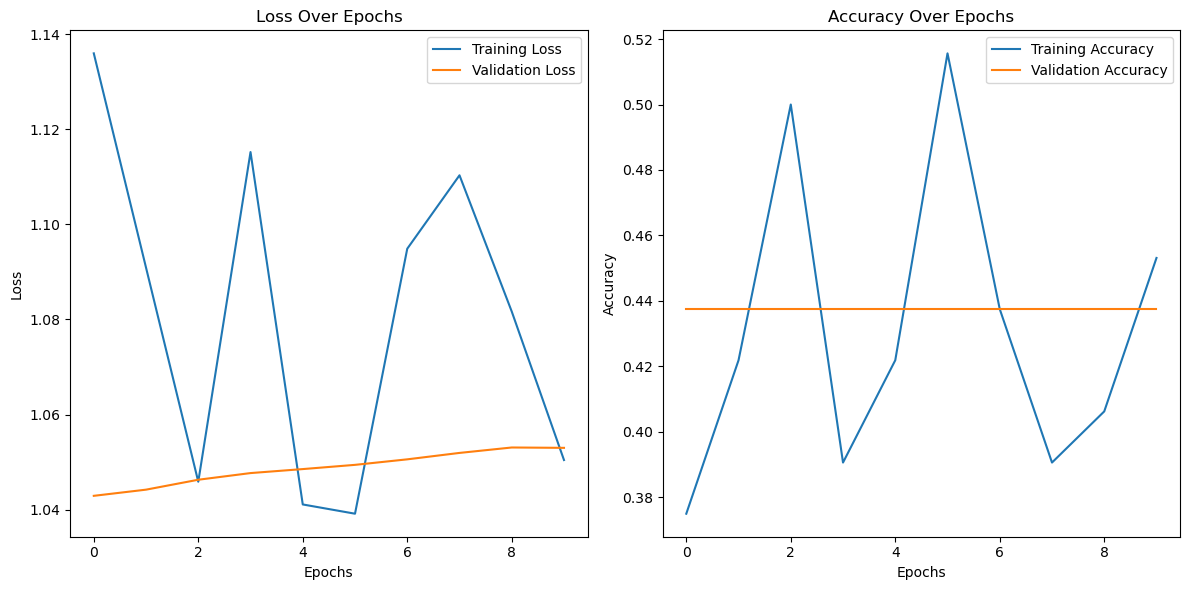

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = np.random.rand(100, 10, 5) 
y = np.random.randint(0, 3, (100,))  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_layer = Input(shape=(10, 5))  
attention_output = MultiHeadAttention(num_heads=2, key_dim=5)(input_layer, input_layer)
norm1 = LayerNormalization(epsilon=1e-6)(attention_output + input_layer)
dense_output = Dense(32, activation='relu')(norm1)
dropout_output = Dropout(0.3)(dense_output)
final_output = Dense(3, activation='softmax')(dropout_output)  

final_output = final_output[:, -1, :]  


model = Model(inputs=input_layer, outputs=final_output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Predictions:\n", y_pred)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from ipywidgets import VBox, HBox, Text, Button, Output, Label

# Function to create and compile the model
def create_transformer_model(input_shape=(1, 5), num_classes=2):
    input_layer = Input(shape=input_shape)
    attention_output = MultiHeadAttention(num_heads=2, key_dim=5)(input_layer, input_layer)
    norm1 = LayerNormalization(epsilon=1e-6)(attention_output + input_layer)
    dense_output = Dense(32, activation='relu')(norm1)
    dropout_output = Dropout(0.3)(dense_output)
    final_output = Dense(num_classes, activation='softmax')(dropout_output)
    model = Model(inputs=input_layer, outputs=final_output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to train and evaluate the model
def train_and_evaluate():
    output.clear_output()
    with output:
        try:
            # Generate random synthetic data (replace with actual data as needed)
            X = np.random.rand(100, 1, 5)  # 100 samples, 1 timestep, 5 features
            y = np.random.randint(0, 2, (100, 1))  # 2 classes (Pollux or Progressive)

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Reshape y_train and y_test to match the model's output
            y_train_reshaped = np.expand_dims(y_train, axis=-1)
            y_test_reshaped = np.expand_dims(y_test, axis=-1)

            # Create the Transformer model
            model = create_transformer_model(input_shape=(1, 5), num_classes=2)

            # Train the model
            history = model.fit(X_train, y_train_reshaped, epochs=10, batch_size=16, validation_split=0.2)

            # Evaluate the model
            loss, accuracy = model.evaluate(X_test, y_test_reshaped)
            print(f"Test Accuracy: {accuracy:.4f}")

            # Visualization of Loss and Accuracy
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

            # Plot training and validation loss
            ax1.plot(history.history['loss'], label='Training Loss')
            ax1.plot(history.history['val_loss'], label='Validation Loss')
            ax1.set_title('Loss Over Epochs')
            ax1.set_xlabel('Epochs')
            ax1.set_ylabel('Loss')
            ax1.legend()

            # Plot training and validation accuracy
            ax2.plot(history.history['accuracy'], label='Training Accuracy')
            ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
            ax2.set_title('Accuracy Over Epochs')
            ax2.set_xlabel('Epochs')
            ax2.set_ylabel('Accuracy')
            ax2.legend()

            plt.show()

        except Exception as e:
            print(f"An error occurred: {e}")

# Function to make prediction based on user input
def make_prediction(_):
    output.clear_output()
    with output:
        try:
            # Get the user input sequence
            sequence_data = input_field.value.strip().split(',')
            sequence_data = list(map(float, sequence_data))  # Convert to float
            if len(sequence_data) != 5:  # Ensuring input length matches expected (5 features)
                raise ValueError("Input sequence must have exactly 5 values.")

            # Reshape data to match model input shape (1, 1, 5)
            sequence_data = np.array(sequence_data).reshape(1, 1, 5)

            # Create the Transformer model
            model = create_transformer_model(input_shape=(1, 5), num_classes=2)

            # Predict with the model
            prediction = model.predict(sequence_data)

            # Convert prediction to class (Pollux or Progressive)
            predicted_class = np.argmax(prediction, axis=-1)[0][0]  # Get the predicted class index
            class_names = ["Pollux", "Progressive"]  # Map indices to class names
            predicted_label = class_names[predicted_class]

            # Display the prediction result
            print(f"Predicted Class: {predicted_label}")

        except Exception as e:
            print(f"An error occurred: {e}")

# GUI Components
input_label = Label("Enter sequence of 5 values (comma separated):")
input_field = Text(placeholder="Enter sequence here...")
train_button = Button(description="Train & Evaluate Model")
predict_button = Button(description="Make Prediction")
output = Output()

# Bind events
train_button.on_click(lambda _: train_and_evaluate())
predict_button.on_click(make_prediction)

# Display GUI
VBox([input_label, input_field, HBox([train_button, predict_button]), output])
